In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [20]:
import statsmodels.api as sm

In [6]:
marketing = pd.read_csv("DirectMarketing.csv")

marketing = marketing.loc[:, ["AmountSpent", "Salary", "History"]]

In [11]:
marketing_with_dummies = pd.get_dummies(marketing, dummy_na=True, drop_first=True)

In [55]:
train_indices, test_indices = train_test_split(np.array(marketing_with_dummies.index), 
                                               test_size=0.2, random_state=0)

marketing_train = marketing_with_dummies.loc[train_indices].copy()
marketing_test = marketing_with_dummies.loc[test_indices].copy()

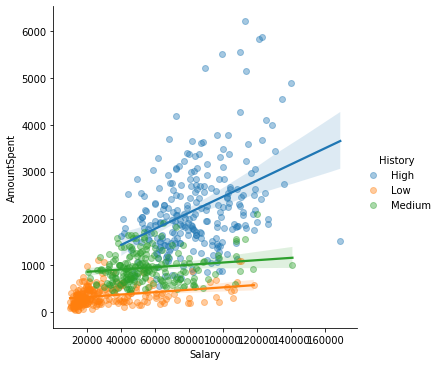

In [58]:
import seaborn as sns
sns.lmplot(y='AmountSpent', x="Salary", data=marketing, hue='History', scatter_kws={"alpha": 0.4})

In [42]:
y_train = np.log(marketing_train['AmountSpent'])

x_train = marketing_train.drop("AmountSpent", axis=1)
x_train = sm.add_constant(x_train)

In [43]:
model = sm.OLS(y_train, x_train).fit()

In [44]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            AmountSpent   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     454.3
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          1.20e-203
Time:                        14:48:18   Log-Likelihood:                -556.01
No. Observations:                 800   AIC:                             1122.
Df Residuals:                     795   BIC:                             1145.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.4894      0.067     97.

In [45]:
fitted_values = model.fittedvalues
residuals = model.resid

In [46]:
y_train - fitted_values

687    0.142189
500   -0.119992
332    0.703457
979   -0.054546
817   -0.347850
         ...   
835   -0.050987
192    0.441413
629    0.284856
559   -0.329854
684    0.555728
Length: 800, dtype: float64

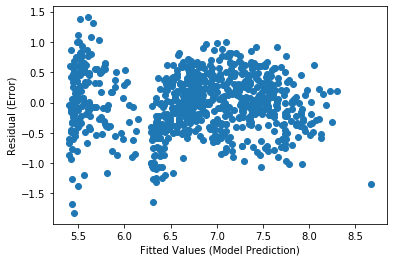

In [47]:
plt.scatter(fitted_values, residuals)
plt.xlabel("Fitted Values (Model Prediction)")
plt.ylabel("Residual (Error)");

$$\large Y = f(x) + \varepsilon$$
where $\varepsilon$ is random.
$$\large Y - f(x) = \varepsilon$$

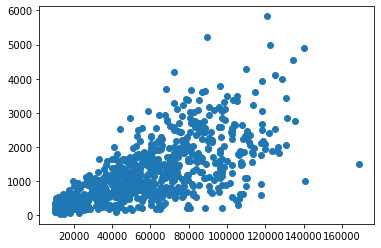

In [50]:
plt.scatter(x_train["Salary"], marketing_train["AmountSpent"])

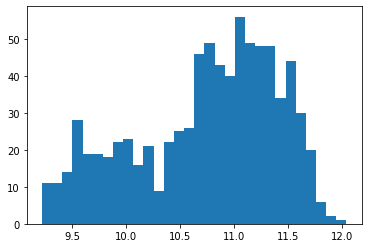

In [53]:
plt.hist(np.log(x_train["Salary"]), bins=30);